In [1]:
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
#from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
#from statsmodels.tsa.seasonal import seasonal_decompose 
from pmdarima import auto_arima        
from pmdarima.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

In [2]:
df = pd.read_csv('C:/ProgramData/ETH/TrainingData/training.csv')
df = df[:30000]
df.head()

,close,date,high,low,open,quoteVolume,volume,weightedAverage
0,738.615957,1609459200,738.615957,736.212707,736.212707,9.191832,6776.937020,737.278171
1,733.205047,1609459500,736.074300,733.205047,736.074300,75.298761,55315.534764,734.614140
2,730.580620,1609459800,733.400000,730.298975,733.195132,34.835544,25493.189969,731.815460
3,731.879341,1609460100,731.917669,731.282995,731.282995,5.355168,3917.951300,731.620666
4,731.563416,1609460400,731.563416,729.518833,731.371327,5.322368,3886.713436,730.260155


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28557 entries, 0 to 28556
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   close            28557 non-null  float64
 1   date             28557 non-null  int64  
 2   high             28557 non-null  float64
 3   low              28557 non-null  float64
 4   open             28557 non-null  float64
 5   quoteVolume      28557 non-null  float64
 6   volume           28557 non-null  float64
 7   weightedAverage  28557 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 1.7 MB


In [4]:
df['DateTime'] = pd.to_datetime(df.date)
df.set_index("DateTime", drop=False, inplace=True)
#df.index.freq = '5min'
#df.index = pd.DatetimeIndex(df.index).to_period('5min')
exogenous_features = ['date','open','high','low','volume','quoteVolume', 'weightedAverage']
df.head()

,close,date,high,low,open,quoteVolume,volume,weightedAverage,DateTime
DateTime,,,,,,,,,
1970-01-01 00:00:01.609459200,738.615957,1609459200,738.615957,736.212707,736.212707,9.191832,6776.937020,737.278171,1970-01-01 00:00:01.609459200
1970-01-01 00:00:01.609459500,733.205047,1609459500,736.074300,733.205047,736.074300,75.298761,55315.534764,734.614140,1970-01-01 00:00:01.609459500
1970-01-01 00:00:01.609459800,730.580620,1609459800,733.400000,730.298975,733.195132,34.835544,25493.189969,731.815460,1970-01-01 00:00:01.609459800
1970-01-01 00:00:01.609460100,731.879341,1609460100,731.917669,731.282995,731.282995,5.355168,3917.951300,731.620666,1970-01-01 00:00:01.609460100
1970-01-01 00:00:01.609460400,731.563416,1609460400,731.563416,729.518833,731.371327,5.322368,3886.713436,730.260155,1970-01-01 00:00:01.609460400


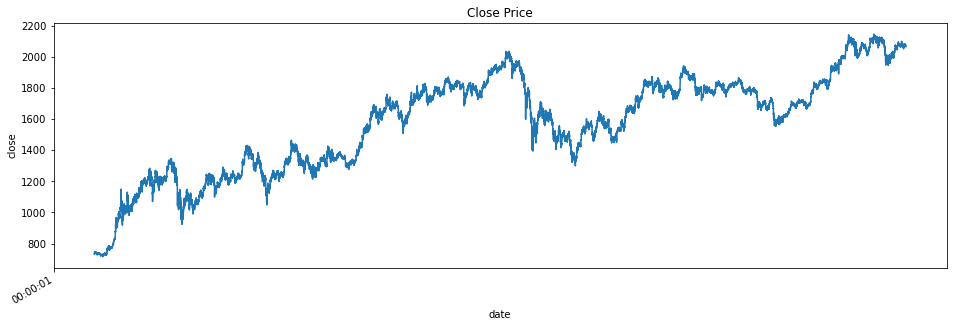

In [5]:
ax = df.close.plot(figsize = (16,5), title = "Close Price")
ax.set(xlabel='date', ylabel='close');

In [6]:
train_data, test_data = train_test_split(df, train_size=10000)

In [9]:
arima_model = auto_arima(train_data.close, exogenous=train_data[exogenous_features])
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                10000
Model:               SARIMAX(2, 0, 0)   Log Likelihood              -24314.623
Date:                Sat, 10 Apr 2021   AIC                          48649.246
Time:                        11:43:16   BIC                          48721.349
Sample:                             0   HQIC                         48673.652
                              - 10000                                         
Covariance Type:                  opg                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
date             1.512e-10   1.89e-10      0.802      0.423   -2.18e-10    5.21e-10
open               -0.5427    6.2e-05  -8751.987      0.000      -0.543      -0.543
high                0.8331   6.38e-05   1.31e+04      0.000       0.833       0.833
low                 0.6738   6.02e-05   1.12e+04      0.000       0.674       0.674
volume           2.888e-06   3.56e-07      8.107      0.000    2.19e-06    3.59e-06
quoteVolume        -0.0027      0.000     -6.511      0.000      -0.004      -0.002
weightedAverage     0.0351   6.05e-05    580.792      0.000       0.035       0.035
ar.L1              -0.0304   1.15e-07  -2.65e+05      0.000      -0.030      -0.030
ar.L2               0.0225   4.35e-06   5175.978      0.000       0.023       0.023
sigma2              7.5779   1.23e-08   6.14e+08      0.000       7.578       7.578
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             23842.38
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.57   Skew:                             0.30
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.22e+24. Standard errors may be unstable.
"""

In [10]:
arima_model.fit(train_data.close)

ARIMA(order=(2, 0, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [11]:
forecast = arima_model.predict(n_periods=len(test_data), exogenous=test_data[exogenous_features])
test_data["Forecast_ARIMAX"] = forecast

<ipython-input-11-bbcdf7e12f0e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data["Forecast_ARIMAX"] = forecast


In [12]:
test_data.head()

,close,date,high,low,open,quoteVolume,volume,weightedAverage,DateTime,Forecast_ARIMAX
DateTime,,,,,,,,,,
1970-01-01 00:00:01.612453500,1575.000000,1612453500,1581.211360,1575.000000,1580.722058,217.641469,3.435421e+05,1578.477158,1970-01-01 00:00:01.612453500,1582.083301
1970-01-01 00:00:01.612453800,1577.626060,1612453800,1582.199528,1574.272905,1574.272905,265.481626,4.190938e+05,1578.616957,1970-01-01 00:00:01.612453800,1582.063377
1970-01-01 00:00:01.612454100,1579.041412,1612454100,1585.000000,1576.814658,1576.970000,201.317501,3.182216e+05,1580.695167,1970-01-01 00:00:01.612454100,1582.043453
1970-01-01 00:00:01.612454400,1586.151389,1612454400,1586.151389,1566.932440,1582.600000,775.261930,1.221864e+06,1576.065464,1970-01-01 00:00:01.612454400,1582.023529
1970-01-01 00:00:01.612454700,1577.106188,1612454700,1588.813006,1577.106188,1586.887995,176.427257,2.795489e+05,1584.499457,1970-01-01 00:00:01.612454700,1582.003605


<AxesSubplot:xlabel='DateTime'>

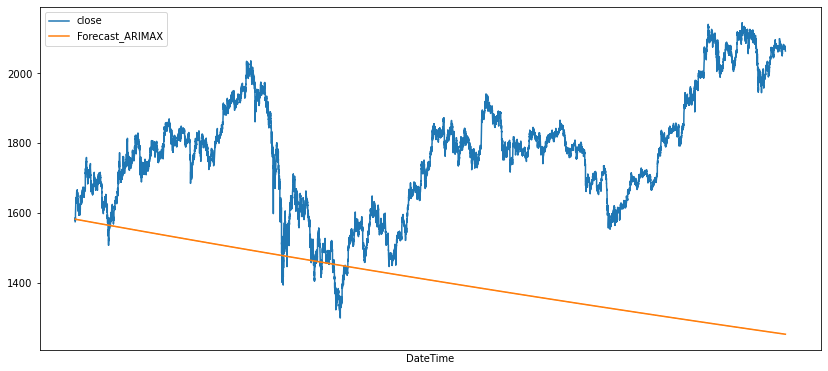

In [13]:
test_data[["close", "Forecast_ARIMAX"]].plot(figsize=(14, 7))

In [ ]:
arima_pred = arima_result.predict(start = len(train_data), end = len(df)-1, typ="levels").rename("ARIMA Predictions")
arima_pred

In [ ]:
test_data['close'].plot(figsize = (16,5), legend=True)
arima_pred.plot(legend = True);

In [ ]:
arima_rmse_error = rmse(test_data['close'], arima_pred)
arima_mse_error = arima_rmse_error**2
mean_value = df['close'].mean()

print(f'MSE Error: {arima_mse_error}\nRMSE Error: {arima_rmse_error}\nMean: {mean_value}')